In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("train.csv")
#val = pd.read_csv("validation.csv")

In [6]:
train.insert(0, 'Imps', 1)
train['clickcost'] = train['click']*train['payprice']
train['OS'],train['browser'] = train['useragent'].str.split('_', 1).str
#train['slot_size']= train['slotwidth']*train['slotheight']

In [7]:
train.slot_width = train.slotwidth.astype(str)
train.slot_width
train.slot_height = train.slotheight.astype(str)
train.slot_height


0          200
1          250
2          250
3          600
4           90
5          280
6           90
7          600
8           90
9           90
10         250
11          90
12         280
13          90
14         250
15          90
16         280
17         280
18          90
19          90
20          90
21         600
22         250
23          90
24          90
25         600
26         250
27         250
28         250
29         250
          ... 
2430951     90
2430952    600
2430953    280
2430954    250
2430955    280
2430956     60
2430957    250
2430958     90
2430959     90
2430960    250
2430961     90
2430962    250
2430963     90
2430964    250
2430965    250
2430966    280
2430967    250
2430968     90
2430969    250
2430970     90
2430971    250
2430972     90
2430973     90
2430974    280
2430975     90
2430976    600
2430977    280
2430978    250
2430979     90
2430980    280
Name: slotheight, Length: 2430981, dtype: object

In [8]:
slot_size = train.slot_width + '*' + train.slot_height
train['Slot__Size'] = slot_size

In [9]:
train.head(5)

,Imps,click,weekday,hour,bidid,userid,useragent,IP,region,city,...,creative,bidprice,payprice,keypage,advertiser,usertag,clickcost,OS,browser,Slot__Size
0,1,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,...,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN,0,windows,ie,200*200
1,1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,...,10722,294,23,NaN,2821,NaN,0,windows,chrome,300*250
2,1,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,...,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",0,windows,ie,250*250
3,1,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,...,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",0,windows,ie,160*600
4,1,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,...,7330,277,133,NaN,2259,NaN,0,windows,ie,728*90


In [10]:
train['CTR%'] = train['click']/train['Imps']*100
train['CPM'] = train['payprice']/(train['Imps'])
train['eCPC'] = train['payprice']/train['click']/1000
train['eCost'] = train['clickcost']/(train['payprice'])


In [11]:
train['region'].apply(str)
train['city'].apply(str)
#df['A'].apply(str)

0            2
1          239
2           41
3            1
4          233
5          277
6           89
7           19
8          342
9            2
10         309
11         219
12         301
13          64
14          79
15           1
16         387
17         278
18          32
19         279
20          91
21          97
22         219
23          79
24          89
25         193
26         217
27         166
28         145
29         288
          ... 
2430951     27
2430952    289
2430953     79
2430954    190
2430955     41
2430956    334
2430957    354
2430958    187
2430959    160
2430960    315
2430961    309
2430962    276
2430963     32
2430964    334
2430965    217
2430966    161
2430967    219
2430968    343
2430969     24
2430970    217
2430971    164
2430972     57
2430973    397
2430974     73
2430975      4
2430976     79
2430977    334
2430978    308
2430979      1
2430980     99
Name: city, Length: 2430981, dtype: object

In [12]:
train_df = train.drop(['usertag','slotvisibility','slotformat','bidid','userid','useragent','IP','domain','url','urlid','slotid','creative','keypage'], axis=1)
train_df.head(5)

,Imps,click,weekday,hour,region,city,adexchange,slotwidth,slotheight,slotprice,...,payprice,advertiser,clickcost,OS,browser,Slot__Size,CTR%,CPM,eCPC,eCost
0,1,0,5,22,2,2,2.0,200,200,5,...,5,3427,0,windows,ie,200*200,0.0,5.0,inf,0.0
1,1,0,1,20,238,239,1.0,300,250,0,...,23,2821,0,windows,chrome,300*250,0.0,23.0,inf,0.0
2,1,0,3,13,40,41,2.0,250,250,5,...,24,3427,0,windows,ie,250*250,0.0,24.0,inf,0.0
3,1,0,6,23,1,1,1.0,160,600,0,...,25,1458,0,windows,ie,160*600,0.0,25.0,inf,0.0
4,1,0,5,6,216,233,2.0,728,90,133,...,133,2259,0,windows,ie,728*90,0.0,133.0,inf,0.0


In [13]:
df_1458 = train_df[train_df['advertiser']==1458] ##
df_2259 = train_df[train_df['advertiser']==2259] ###
df_2997 = train_df[train_df['advertiser']==2997] ###
df_3358 = train_df[train_df['advertiser']==3358]
df_3386 = train_df[train_df['advertiser']==3386]
df_3427 = train_df[train_df['advertiser']==3427]
df_3476 = train_df[train_df['advertiser']==3476]
df_2261 = train_df[train_df['advertiser']==2261]
df_2821 = train_df[train_df['advertiser']==2821]

In [14]:
week_df = train_df.groupby(['advertiser','weekday']).mean()
hour_df = train_df.groupby(['advertiser','hour']).mean()
OS_df = train_df.groupby(['advertiser','OS']).mean()
browser_df = train_df.groupby(['advertiser','browser']).mean()
region_df = train_df.groupby(['advertiser','region']).mean()
city_df = train_df.groupby(['advertiser','city']).mean()
slot_df = train_df.groupby(['advertiser','Slot__Size']).mean()
adex_df = train_df.groupby(['advertiser','adexchange']).mean()

In [159]:
#x_features = ['weekday','hour','OS','browser','region','Slot__Size','adexchange']
#y_features = ['CTR%','payprice','eCPC']

In [33]:
x= 'browser'
y= 'payprice'

In [34]:
d1 = df_1458.groupby([x]).mean()
d1 = d1[y]
d_1 = pd.DataFrame(data = d1).reset_index()
d_1.head(5)

,browser,payprice
0,chrome,71.541714
1,firefox,68.336451
2,ie,67.841532
3,maxthon,71.364152
4,opera,70.495614


In [35]:
d2 = df_2259.groupby([x]).mean()
d2 = d2[y]
d_2 = pd.DataFrame(data = d2).reset_index()
d_2.head(5)

,browser,payprice
0,chrome,95.927323
1,firefox,93.839416
2,ie,91.380214
3,maxthon,83.017182
4,opera,62.448598


In [36]:
d3 = df_2997.groupby([x]).mean()
d3 = d3[y]
d_3 = pd.DataFrame(data = d3).reset_index()
d_3.head(5)

,browser,payprice
0,chrome,64.784000
1,ie,66.000000
2,maxthon,67.125000
3,other,59.674762
4,safari,62.860191


In [37]:
d_A = train_df.groupby([x]).mean()
d_A = d_A[y]
d_a = pd.DataFrame(data = d_A).reset_index()
d_a.head(5)


,browser,payprice
0,chrome,80.799593
1,firefox,72.279466
2,ie,77.235134
3,maxthon,72.796660
4,opera,72.285143


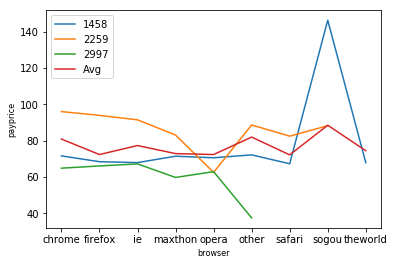

In [38]:
f, axes = plt.subplots(figsize=(6,4),sharex=False)

d1.plot(label = "1458")
d2.plot(label = "2259")
d3.plot(label = "2997")
d_A.plot(label = "Avg")

#plt.title("graph", fontsize=10)
plt.legend()
plt.ylabel(y, fontsize=8)
plt.xlabel(x, fontsize=8)
#plt.xticks(np.arange(0, 24, 1.0))
plt.show()

In [39]:
d_all = pd.merge(d_1, d_2, how='outer', on=[x, x])
d_all = pd.merge(d_all, d_3, how='outer', on=[x, x])
#d_all = pd.merge(d_all, d_a, how='outer', on=[x, x])
d_all

,browser,payprice_x,payprice_y,payprice
0,chrome,71.541714,95.927323,64.784000
1,firefox,68.336451,93.839416,NaN
2,ie,67.841532,91.380214,66.000000
3,maxthon,71.364152,83.017182,67.125000
4,opera,70.495614,62.448598,NaN
5,other,72.092585,88.544604,59.674762
6,safari,67.216010,82.400225,62.860191
7,sogou,146.200000,NaN,37.400000
8,theworld,67.820000,88.177945,NaN


In [40]:
d_all= d_all.rename(columns={'payprice_x': '1458'})
d_all= d_all.rename(columns={'payprice_y': '2259'})
d_all= d_all.rename(columns={'payprice': '2997'})

d_all= d_all.rename(columns={'CTR%_x': '1458'})
d_all= d_all.rename(columns={'CTR%_y': '2259'})
d_all= d_all.rename(columns={'CTR%': '2997'})

d_all = d_all.fillna(0)
#d_all = d_all.fillna(0)
#d_all = d_all.fillna(0)


d_all

,browser,1458,2259,2997
0,chrome,71.541714,95.927323,64.784000
1,firefox,68.336451,93.839416,0.000000
2,ie,67.841532,91.380214,66.000000
3,maxthon,71.364152,83.017182,67.125000
4,opera,70.495614,62.448598,0.000000
5,other,72.092585,88.544604,59.674762
6,safari,67.216010,82.400225,62.860191
7,sogou,146.200000,0.000000,37.400000
8,theworld,67.820000,88.177945,0.000000


In [41]:
d_all = pd.merge(d_all, d_a, how='outer', on=[x, x])
d_all= d_all.rename(columns={'CTR%': 'Avg'})
d_all= d_all.rename(columns={'payprice': 'Avg'})
d_all

,browser,1458,2259,2997,Avg
0,chrome,71.541714,95.927323,64.784000,80.799593
1,firefox,68.336451,93.839416,0.000000,72.279466
2,ie,67.841532,91.380214,66.000000,77.235134
3,maxthon,71.364152,83.017182,67.125000,72.796660
4,opera,70.495614,62.448598,0.000000,72.285143
5,other,72.092585,88.544604,59.674762,81.888711
6,safari,67.216010,82.400225,62.860191,72.098584
7,sogou,146.200000,0.000000,37.400000,88.419355
8,theworld,67.820000,88.177945,0.000000,74.402424


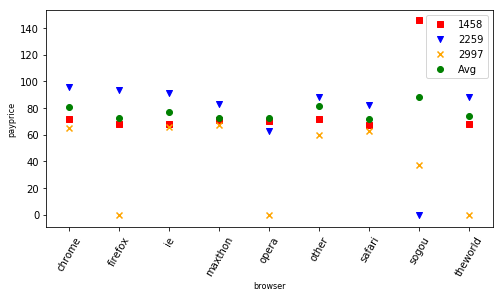

In [44]:
f, axes = plt.subplots(figsize=(8,4),sharex=False)

plt.scatter(d_all[x],d_all['1458'], label = "1458", color="red",marker = 's')
plt.scatter(d_all[x],d_all['2259'],label = "2259", color="blue",marker = 'v')
plt.scatter(d_all[x],d_all['2997'], label = "2997", color="orange",marker = 'x')
plt.scatter(d_all[x],d_all['Avg'], label = "Avg", color="green",marker = 'o')

plt.legend()
plt.ylabel(y, fontsize=8)
plt.xlabel(x, fontsize=8)
plt.xticks(d_all[x] ,rotation=60)

plt.show()

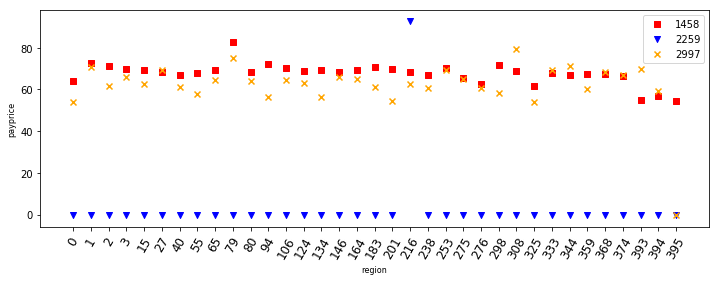

In [178]:
f, axes = plt.subplots(figsize=(12,4),sharex=False)

newx = np.arange(len(d_all['region']))

plt.scatter(newx,d_all['1458'], label = "1458", color="red",marker = 's')
plt.scatter(newx,d_all['2259'],label = "2259", color="blue",marker = 'v')
plt.scatter(newx,d_all['2997'], label = "2997", color="orange",marker = 'x')

plt.legend()
plt.ylabel(y, fontsize=8)
plt.xlabel(x, fontsize=8)

plt.xticks(newx, d_all[x],fontsize=12,rotation=60)

plt.show()

In [ ]:

df2 = df[['click',f,'eCost']]
df3 = df2.groupby([f]).sum()
df3['eCPC'] = df3['eCost']/df3['click']
df3['eCPC'].plot.bar()
plt.show()

In [ ]:
d3 = df_2259.groupby(['weekday']).mean()
d3 = d3['payprice']
d4 = df_2261.groupby(['weekday']).mean()
d4 = d4['payprice']
d5 = df_2821.groupby(['weekday']).mean()
d5 = d5['payprice']
d6 = df_2997.groupby(['weekday']).mean()
d6 = d6['payprice']
d7 = df_3386.groupby(['weekday']).mean()
d7 = d7['payprice'
d8 = df_2259.groupby(['weekday']).mean()
d8 = d3['payprice']

In [ ]:
d4.plot(label = "d4")
d5.plot(label = "d5")
d6.plot(label = "d6")
d7.plot(label = "d7")
d8.plot(label = "d8")
d9.plot(label = "d9")